<a href="https://colab.research.google.com/github/jisang93/Machine_Learning_for_Study/blob/master/04_Deep_Learning_from_Scratch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Deep Learning from Scratch]**
저자 : 사이토 고키 / 출판사 : 한빛미디어

In [1]:
# 본 책에서 사용하는 패키지
import sys, os, pickle
import numpy as np
import matplotlib.pylab as plt

from PIL import Image
from tqdm import tqdm
from collections import OrderedDict

## **CHAPTER 2 : 퍼셉트론**

### **2.3 퍼셉트론 구현**

#### **2.3.1 간단한 구현**

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

In [ ]:
AND(0, 0), AND(1, 0), AND(1, 1)

(0, 0, 1)

#### **2.3.2 가중치와 편향 도입**

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
AND(0,0), AND(1, 0), AND(1, 1)

(0, 0, 1)

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와 Weight, Bias 값이 달라짐
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array(([0.5, 0.5])) # AND와 Bias 값이 달라짐
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND(0, 0), NAND(1, 0), NAND(1, 1), OR(0, 0), OR(1, 0), OR(1, 1)

(1, 1, 0, 0, 1, 1)

### **2.5 다층 퍼셉트론 적용**

#### **2.5.2 XOR 게이트 구현**

 - 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없음을 다층 퍼셉트론을 이용해 해결

In [ ]:
def XOR(x1, x2): # XOR 게이트는 NAND와 OR, AND 게이트를 활용하면 구할 수 있음
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
XOR(0,0), XOR(1,0), XOR(1,1)

(0, 1, 0)

## **CHAPTER 3 : 신경망**

  - 단순 퍼셉트론은 활성화 함수로 '계단 함수'를 이용한 반면 다층 퍼셉트론의 경우 활성화 함수로 '시그모이드 함수 등'을 이용했다는 점이 다름

### **3.2 활성화 함수**

#### **3.2.2 계단 함수 구현**

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x): # 넘파이 배열 지원
    y = x > 0
    return y.astype(np.int)

#### **3.2.3 계단 함수의 그래프**

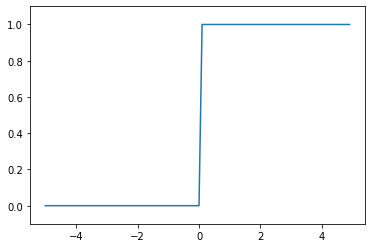

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

#### **3.2.4 시그모이드 함수 구현**

 - 시그모이드 함수, 계단 함수의 공통점
    - 입력 값이 중요하면 큰 값을 출력. 중요하지 않으면 작은 값을 출력
    - 입력 값이 아무리 커도 출력은 0과 1 사이
    - 두 함수 모두 비선형 함수임
    
 - 시그모이드 함수, 계단 함수의 차이점
    - 시그모이드 함수는 입력에 따라 출력이 연속적으로 변화
    - 반면, 계단 함수는 0을 경계로 출력이 바뀜
 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

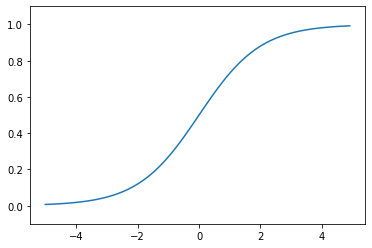

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### **3.2.7 ReLU 함수**

In [ ]:
def relu(x):
    return np.maximum(0, x)

### **3.4 3층 신경망 구현하기**

#### **3.4.2 층별 신호 전달 구현**

In [ ]:
# 입력층(Input Layer)에서 1층(Hidden Layer)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

A1, Z1

(array([0.3, 0.7, 1.1]), array([0.57444252, 0.66818777, 0.75026011]))

In [ ]:
# 1층(Hidden Layer)에서 2층(Hidden Layer)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
# 2층(Hidden Layer)에서 출력층(Output Layer)
def identify_function(x): # 항등 함수 설정
    return x # 이진 분류에서는 시그모이드 함수, 다중 분류에서는 소프트맥스 함수 사용

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
Y

array([0.31682708, 0.69627909])

#### **3.4.3 구현 정리**


In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['B2'] = np.array([0.1, 0.2])
    network['B3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    # 입력층에서 1층
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    # 1층에서 2층
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    # 2층에서 출력층
    A3 = np.dot(Z2, W3) + B3
    Y = identify_function(A3)

    return Y

In [ ]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

### **3.5 출력층 설계**

#### **3.5.1 소프트맥스 함수 구현**

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

#### **3.5.2 소프트맥스 함수 구현 시 주의점**

  - 오버플로우를 막기 위해 최댓값 C 이용

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
a = np.array([1010, 1000, 990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### **3.6 손글씨 숫자 인식**

#### **3.6.1 MNIST 데이터셋**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1'
sys.path.append(path)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    return pil_img

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
img_show(img)

#### **3.6.2 신경망의 추론 처리**

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    # 입력층에서 1층
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    # 1층에서 2층
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    # 2층에서 출력층
    A3 = np.dot(Z2, W3) + B3
    y = softmax(A3)

    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy : " + str(float(accuracy_cnt) /len(x)))

Accuracy : 0.9352


#### **3.6.3 배치 사이즈 설정**

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # True 결과값 세기
    
print("Accuracy : " + str(float(accuracy_cnt) /len(x)))

Accuracy : 0.9352


## **CHAPTER 4 : 신경망 학습**

 - 신경망 학습에 사용하는 지표 : 손실 함수(Loss Function)


### **4.2 손실함수**
- 오차제곱합(Sum of Squares for Error, SSE)
- 교차 엔트로피 오차(Cross Entropy Error, CEE)

#### **4.2.1 오차제곱합(SSE)**
- 구글 검색결과와 본 책에서 제공하는 공식이 조금 다름(본 책에서는 0.5를 곱함)

In [ ]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2) # 오차의 제곱에 0.5를 곱해줌

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

#### **4.2.2 교차 엔트로피 오차(CEE)**

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

#### **4.2.4 (배치용) 교차 엔트로피 오차 구현**

In [ ]:
def cross_entropy_error(y, t): # Input값이 원-핫-인코딩일 경우
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return - np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error(y, t): # Input값이 레이블일 경우
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return - np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### **4.3 수치 미분**

#### **4.3.1 미분**

In [ ]:
def numerical_diff(f, x): # 수치 미분
    h = 1e-4 # 0.0001을 의미
    return (f(x+h) - f(x-h)) / 2*h # 중심 차분을 구하기 위해 x+h와 x-h를 계산함

#### **4.3.2 수치 미분 예시**

In [ ]:
def function_a(x):
    return 0.01 * x**2 + 0.1*x

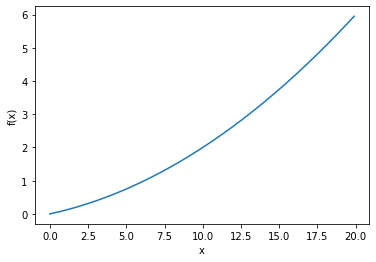

In [ ]:
x = np.arange(0, 20, 0.1) # 0에서 20까지 0.1 간격의 배열 x
y = function_a(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_a, 5) # f(5) 변화량

1.9999999999908982e-09

#### **4.3.3 편미분**

In [ ]:
def function_b(x):
    return x[0]**2 + x[1]**2

# x0 = 3 x1 = 4일때, x0에 대한 편미분
def function_b_tmp(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_b_tmp, 3.0)

6.000000000003781e-08

### **4.4 기울기**

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모두 0인 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [ ]:
numerical_gradient(function_b, np.array([3.0, 4.0])) # 각 점에서의 기울기 계산

array([6., 8.])

#### **4.4.1 경사 하강법**

- 기울기를 이용해 함수의 최솟값을 찾는 방법

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in tqdm(range(step_num)):
        grad = numerical_gradient(f, x)
        x -= lr * grad # 기울기에 학습률을 곱해 갱신 처리
    return x

In [ ]:
# 경사 하강법을 이용해 최솟값 탐색
init_x = np.array([-3.0, 4.0])
gradient_descent(function_b, init_x=init_x, lr=0.1, step_num=100)

100%|██████████| 100/100 [00:00<00:00, 47031.89it/s]


array([-6.11110793e-10,  8.14814391e-10])

#### **4.4.2 신경망에서의 기울기**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/common'
sys.path.append(path)
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()
print(net.W) # 가중치 매개변수
print('-'*50)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p) # 최댓값 인덱스
print('-'*50)
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x,t)

[[-1.53960919  1.988648    1.69038416]
 [ 1.0421999  -0.1443081   0.64931165]]
--------------------------------------------------
[0.01421439 1.06331151 1.59861098]
--------------------------------------------------


0.5825312696766601

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

##############################################################################
# 람다를 이용해 def 함수와 같은 역할 수행
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)

[[ 0.06871733  0.19619294 -0.26491027]
 [ 0.103076    0.29428941 -0.3973654 ]]


### **4.5 학습 알고리즘 구현**

 - 1단계 : 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져옴.
    - 미니배치의 손실 함수 값을 줄이는 것이 목표.

 - 2단계 : 기울기 산출
    - 각 가중치 매개변수의 기울기를 구함.
    - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시.

 - 매개변수 갱신(Stochastic Gradient Descent, SGD)
    - 가중치 매개변수를 기울기 방향으로 갱신
    - SGD : 무작위 확률로 골라낸 데이터에 대해 수행하는 경사 하강법

#### **4.5.1 2층 신경망 클래스 구현**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/common'
sys.path.append(path)
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                           np.random.randn(input_size, hidden_size) # 첫 번째 층 가중치
        self.params['W2'] = weight_init_std * \
                           np.random.randn(hidden_size, output_size) # 두 번째 층 가중치
        self.params['b1'] = np.zeros(hidden_size) # 첫 번째 층 편향
        self.params['b2'] = np.zeros(output_size) # 두 번째 층 편향

    def predict(self, x): # 예측 수행
        # 변수 불러오기
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t): # 오차 계산
        # x : 입력 데이터, t : 정답 라벨
        y = self.predict(x) # 예측 결과 불러오기 
        return cross_entropy_error(y, t) # 교차 엔트로피 오차 수행

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 예측 확률이 큰 라벨이 결과값
        t = np.argmax(t, axis=1)
        # 정확도 계산
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t): # 가중치의 매개변수 기울기 계산
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

#### **4.5.2 미니배치 학습 구현**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1'
sys.path.append(path)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터 설정
iters_num = 5
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    grad = net.numerical_gradient(x_batch, t_batch)
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록
    loss = net.loss(x_batch, t_batch)
    train_loss_list.append(loss)


100%|██████████| 5/5 [06:07<00:00, 73.60s/it]


#### **4.5.3 시험 데이터로 평가**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1'
sys.path.append(path)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터 설정
iters_num = 5
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 1에폭당 반복 수
iter_per_epochs = max(train_size / batch_size, 1)

train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    grad = net.numerical_gradient(x_batch, t_batch)
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록
    loss = net.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 1에폭당 정확도 계산
    if i % iter_per_epochs == 0:
        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc : {}, test_acc : {}'.format(train_acc, test_acc))

## **CHAPTER 5 : 오차역전파법(Backpropagation)**

### **5.4 단순한 계층 구현**
 - 곱셈 노드(MultiLayer)
 - 덧셈 노드(AddLayer)

#### **5.4.1 곱셈 계층**

In [ ]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y # 곱셈 계산
        return out

    def backward(self, dout): # 역전파
        dx = dout * self.y # x와 y의 위치를 바꿈(미분)
        dy = dout * self.x
        return dx, dy

#### **5.4.1 덧셈 계층**

In [ ]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파(forward)
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파(backward)
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price : {}".format(price))
print("dapple_num : {}, dorange_num : {}, dapple : {}, dorange : {}, dtax : {}".format(dapple_num, dorange_num, dapple, dorange, dtax))

price : 715.0000000000001
dapple_num : 110.00000000000001, dorange_num : 165.0, dapple : 2.2, dorange : 3.3000000000000003, dtax : 650


### **5.5. 활성화 함수 계층 구현**

#### **5.5.1 ReLU 계층**

 - x가 0 이하는 0 출력. x가 0 초과할 때는 x값 출력

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0) # True/False로 구성된 넘파이 배열
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, out):
        dout[self.mask] = 0
        dx = dout
        return dx

In [ ]:
x = np.array([[1, -0.5], [-2, 3]])
relu = Relu()
relu.forward(x)

array([[1., 0.],
       [0., 3.]])

#### **5.5.2 Sigmoid 계층**

 - y = 1 / (1 + exp(-x))

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [ ]:
x = np.array([[1, -0.5], [-2, 3]])
sig = Sigmoid()
sig.forward(x)

array([[0.73105858, 0.37754067],
       [0.11920292, 0.95257413]])

### **5.6 Affine/Softmax 계층 구현**

#### **5.6.2 배치용 Affine 계층**

 - Foward 때 수행하는 행렬 곱을 Affine 변환이라고 함

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
3        return dx

#### **5.6.3 Softmax with Loss 계층**

 - 손실함수인 교차 엔트로피 오차(CEE)가 포함된 Softmax 계층

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실값
        self.y = None # Softmax 출력값
        self.t = None # 정답 라벨(원-핫 벡터)
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

### **5.7 오차역전파법 구현**

 - 1단계 - 미니배치
 - 2단계 - 기울기 산출
    
    : 각 가중치 매개변수의 기울기 계산
 - 3단계 - 매개변수 갱신
 - 4단계 - 반복

#### **5.7.2 오차역전파법을 적용한 신경망**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/'
sys.path.append(path)
from common.layers import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init__std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.rand(input_size, hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.rand(hidden_size, output_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_graident(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 정장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['W2'] = self.layers['Affine2'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['b2'] = self.layers['Affine2'].db

        return grads

#### **5.7.3 오차역전파법으로 구한 기울기 검증(Gradient Check)**

 - 수치 미분방식과 오차역전파법 방식의 기울기 차가 거의 없음을 확인 가능

In [4]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/'
sys.path.append(path)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
grad_backprop = network.gradient(x_batch, t_batch) # Back Propagation 방식

# 각 가중치의 차이의 절대값을 구한 후, 그 절대값들의 평균을 구함
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff)) # 거의 차이 없음을 확인 가능함

W1:4.839512539714588e-10
b1:2.9830048191986648e-09
W2:6.1692507483443444e-09
b2:1.4048288078383208e-07


#### **5.7.4 오차역전파법을 이용한 학습 구현**

In [7]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 불러오기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 출력
    if i % iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train Accuracy : {}, Test Accuracy : {}".format(train_acc, test_acc))

  2%|▏         | 17/1000 [00:00<05:44,  2.85it/s]

Train Accuracy : 0.10356666666666667, Test Accuracy : 0.102


 63%|██████▎   | 633/1000 [00:04<00:03, 97.95it/s]

Train Accuracy : 0.9023666666666667, Test Accuracy : 0.9064


100%|██████████| 1000/1000 [00:06<00:00, 158.33it/s]


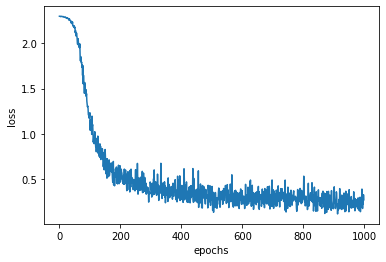

In [14]:
# Loss 감소 확인
x = np.arange(0, 1000, 1)
y = train_loss_list

plt.plot(x, y)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## **CHAPTER 6 : 학습 관련 기술들**

### **6.1 매개변수 갱신**

#### **6.1.2 확률적 경사 하강법(SGD)**

 - 장점 : 단순하고 구현이 쉬움
 - 단점 : 문제에 따라서 비효율적일 경우가 있음

In [15]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

#### **6.1.4 모멘텀(Momentum)**

 - v라는 변수가 추가됨
 - v는 물리에서 말하는 속도의 개념
 - SGD와 비교해 '지그재그 정도'가 덜함
 - 전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듬

In [16]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

#### **6.1.5 AdaGrad**

 - '각각의' 매개변수에 '맞춤형' 값을 만들어줌
 - 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하며 학습을 진행
 - h라는 변수 추가
 - 매개변수의 원소 중에 크게 갱신된 원소의 학습률이 낮아짐
 - 갱신량이 0이 되는 문제 발생
 - 이를 극복한 것이 RMSProp으로 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영함

In [17]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grad[key] * grads[key]
            # 1e-7을 통해 0으로 나뉘는 상황을 막아줌
            params[key] -= self.lr * gards[key] / (np.sqrt(self.h[key]) + 1e-7)

### **6.2 가중치의 초기값**

 - 가중치의 초기값을 무엇으로 설정하냐에 따라 신경망 학습의 성패를 가름

#### **6.2.2. 은닉층의 활성화값 분포**

 - 가중치의 초기값에 따라 은닉층 활성화값이 어떻게 변화하는지 확인

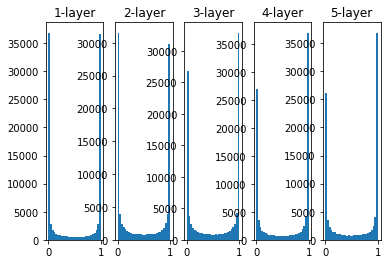

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 랜덤값
node_num = 100 # 은닉층의 노드 수
hidden_layer_num = 5 # 은닉층의 개수
activations = {} # 활성화값 저장

for i in range(hidden_layer_num):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### **6.4 바른 학습을 위해**

#### **6.4.1 오버피팅**

 - 매개변수가 많고 표현력이 높은 모델
 - 훈련 데이터가 적음

In [23]:
from common.multi_layer_net import *

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100,
                        100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in tqdm(range(10000000)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

  0%|          | 598/10000000 [00:58<266:10:55, 10.44it/s]

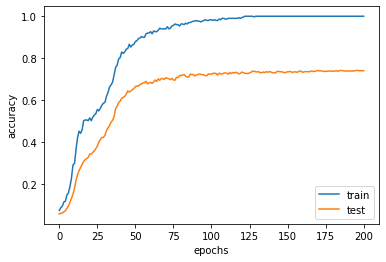

In [41]:
# 오버피팅 확인
x = np.arange(0, 201, 1)
y1 = train_acc_list
y2 = test_acc_list

plt.plot(x, y1, label='train')
plt.plot(x, y2, label='test')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

#### **6.4.3 드롭아웃**

 - 오버피팅을 억제하는 방법 : 가중치 감소(Weight Decay), 드롭아웃(Drop Out)
 - 뉴런을 임의로 삭제하며 학습하는 방법
 - 훈련 때, 삭제할 뉴런을 무작위로 선택. 시험 때, 모든 뉴런에 신호 전달
 - 시험 때, 각 뉴런의 출력에 훈련 때 삭제 안한 비율을 곱하여 출력

In [42]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

### **6.5 적절한 하이퍼파라미터 값 찾기**

#### **6.5.1 검증 데이터(Validation Data)**

 - Train Data : 매개변수 학습
 - Validation Data : 하이퍼파라미터 성능 평가
 - Test Data : 신경망의 범용 성능 평가

In [44]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 섞음
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

len(x_val), len(t_val), len(x_train), len(t_train)

(12000, 12000, 48000, 48000)